In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
stopwords = set(STOPWORDS)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
test_path = '/content/drive/MyDrive/Colab Notebooks/COVID19-FNIR/Testingset.csv'
fulldataset = '/content/drive/MyDrive/Colab Notebooks/COVID19-FNIR/NewsArticles - Sheet1.csv'
full_dataset = pd.read_csv(fulldataset)
full_dataset.info()
train, val = train_test_split(full_dataset, test_size=0.2, random_state=42)
train.info()
val.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4879 entries, 0 to 4878
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Posted   4879 non-null   object
 1   Link          4879 non-null   object
 2   Text          4879 non-null   object
 3   Region        4879 non-null   object
 4   Origin        4839 non-null   object
 5   Binary Label  4879 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 228.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 2742 to 860
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Posted   3903 non-null   object
 1   Link          3903 non-null   object
 2   Text          3903 non-null   object
 3   Region        3903 non-null   object
 4   Origin        3870 non-null   object
 5   Binary Label  3903 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 213.4+ KB
<class 'pa

In [ ]:
test = pd.read_csv(test_path)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Posted   2437 non-null   object
 1   Link          2437 non-null   object
 2   Text          2437 non-null   object
 3   Region        2437 non-null   object
 4   Origin        2430 non-null   object
 5   Binary Label  2437 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 114.4+ KB


In [ ]:
entire = pd.concat([train, val, test])
entire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 2742 to 2436
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Posted   7316 non-null   object
 1   Link          7316 non-null   object
 2   Text          7316 non-null   object
 3   Region        7316 non-null   object
 4   Origin        7269 non-null   object
 5   Binary Label  7316 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 400.1+ KB


In [ ]:
print(train['Binary Label'].value_counts())
print(val['Binary Label'].value_counts())
print(test['Binary Label'].value_counts())
print(entire['Binary Label'].value_counts())

0    2321
1    1582
Name: Binary Label, dtype: int64
0    588
1    388
Name: Binary Label, dtype: int64
1    1804
0     633
Name: Binary Label, dtype: int64
1    3774
0    3542
Name: Binary Label, dtype: int64


In [ ]:
combined = entire['Text']
fake = entire[entire['Binary Label']==0]['Text']
real = entire[entire['Binary Label']==1]['Text']

In [ ]:
print(sum(len(x) for x in combined) / len(combined))
print(sum(len(x) for x in fake) / len(fake))
print(sum(len(x) for x in real) / len(real))

165.30166757791142
102.62252964426878
224.12771595124536


In [ ]:
print(sum(len(x.split()) for x in combined) / len(combined))
print(sum(len(x.split()) for x in fake) / len(fake))
print(sum(len(x.split()) for x in real) / len(real))

19.028977583378897
16.65330321852061
21.2586115527292


In [ ]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n',' ')
        tx = tx.replace('&amp',' ')
        tx = tx.replace('#','')
        tx = tx.replace('-','')
        tx = tx.replace(';','')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [ ]:
all_tokens = concat_all_sentences(combined)
fake_tokens = concat_all_sentences(fake)
real_tokens = concat_all_sentences(real)

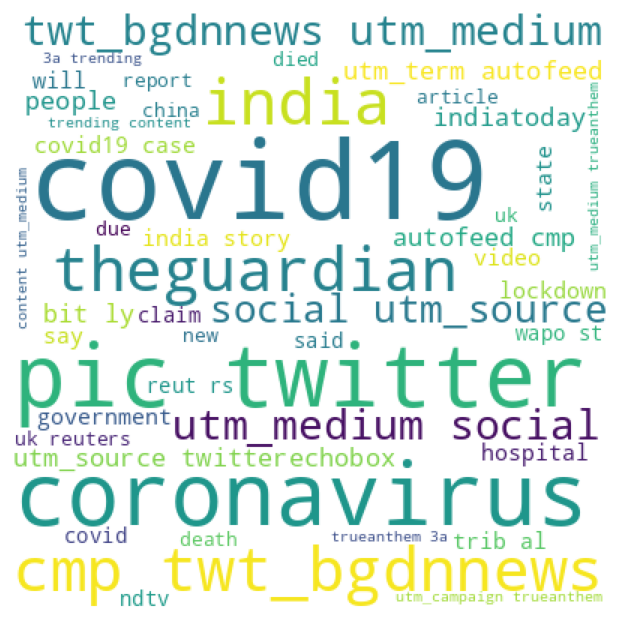

In [ ]:
wordcloud = WordCloud(width = 400, height = 400,
            background_color ='white',
            stopwords = stopwords.union({'https','co'}),
            min_font_size = 10).generate(all_tokens)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

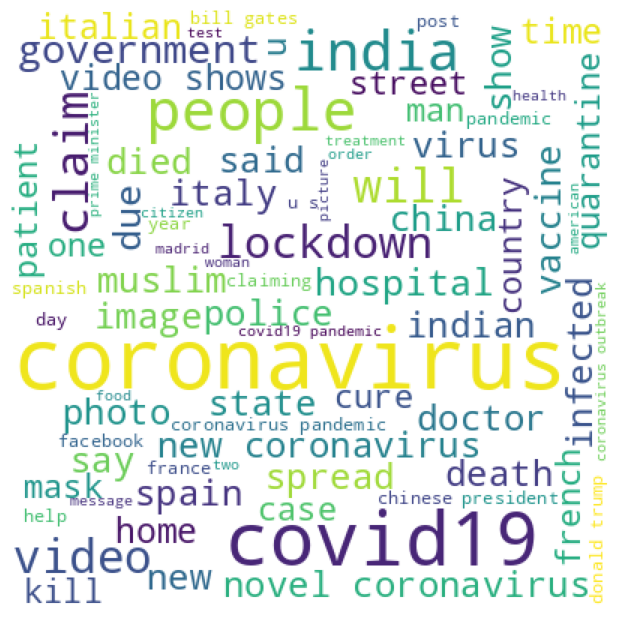

In [ ]:
wordcloud = WordCloud(width = 400, height = 400,
            background_color ='white',
            stopwords = stopwords.union({'https','co'}),
            min_font_size = 10).generate(fake_tokens)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

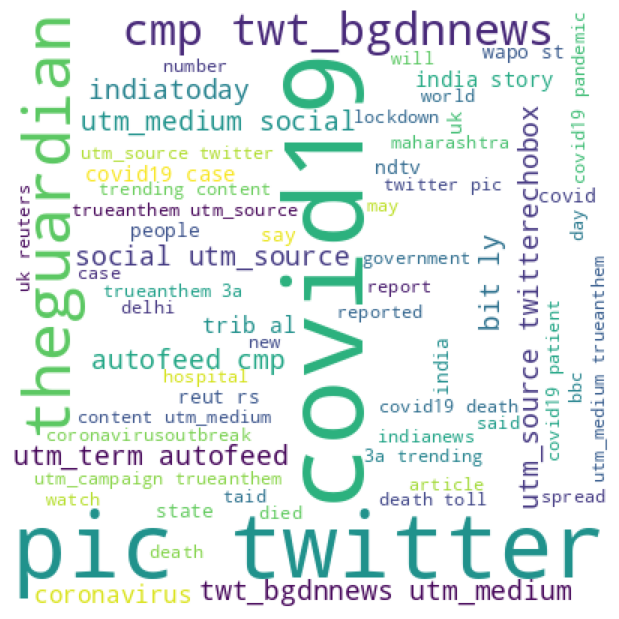

In [ ]:
wordcloud = WordCloud(width = 400, height = 400,
            background_color ='white',
            stopwords = stopwords.union({'https','co'}),
            min_font_size = 10).generate(real_tokens)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
print(len(set(all_tokens.split())))
print(len(set(fake_tokens.split())))
print(len(set(real_tokens.split())))
print(len(set(fake_tokens.split()).intersection(set(real_tokens.split()))))

22677
9592
16901
3816


In [ ]:
all_tokens_words = [w for w in all_tokens.split() if w not in stopwords]
fake_tokens_words = [w for w in fake_tokens.split() if w not in stopwords]
real_tokens_words = [w for w in real_tokens.split() if w not in stopwords]

In [ ]:
Counter(all_tokens_words).most_common(20)

[('covid19', 3636),
 ('coronavirus', 1457),
 ('cases', 637),
 ('people', 549),
 ('new', 478),
 ('coronavirus.', 457),
 ('will', 442),
 ('|', 429),
 ('covid19.', 426),
 ('india', 407),
 ('video', 377),
 ('lockdown', 359),
 ('covid', 359),
 ('government', 353),
 ('positive', 341),
 ('health', 319),
 ('says', 312),
 ('due', 262),
 ('minister', 259),
 ('patients', 256)]

In [ ]:
Counter(fake_tokens_words).most_common(20)

[('coronavirus', 878),
 ('covid19', 600),
 ('coronavirus.', 441),
 ('people', 338),
 ('video', 327),
 ('will', 245),
 ('covid19.', 228),
 ('shows', 215),
 ('government', 179),
 ('indian', 177),
 ('new', 176),
 ('due', 171),
 ('lockdown', 159),
 ('india', 155),
 ('claims', 150),
 ('says', 126),
 ('lockdown.', 120),
 ('police', 116),
 ('image', 116),
 ('president', 111)]

In [ ]:
Counter(real_tokens_words).most_common(20)

[('covid19', 3036),
 ('cases', 588),
 ('coronavirus', 579),
 ('|', 429),
 ('covid', 347),
 ('new', 302),
 ('positive', 285),
 ('india', 252),
 ('health', 237),
 ('uk', 224),
 ('people', 211),
 ('coronavirusoutbreak', 206),
 ('death', 201),
 ('lockdown', 200),
 ('covid19.', 198),
 ('will', 197),
 ('deaths', 188),
 ('says', 186),
 ('live', 186),
 ('number', 179)]